In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data_path = 'Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(data_path)

In [3]:
# Display basic information about the dataset
print("Dataset Overview:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              2322

In [4]:
# Display first few rows
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    VIN (1-10)    County      City State  Postal Code  Model Year    Make  \
0  2T3YL4DV0E      King  Bellevue    WA      98005.0        2014  TOYOTA   
1  5YJ3E1EB6K      King   Bothell    WA      98011.0        2019   TESLA   
2  5UX43EU02S  Thurston   Olympia    WA      98502.0        2025     BMW   
3  JTMAB3FV5R  Thurston   Olympia    WA      98513.0        2024  TOYOTA   
4  5YJYGDEE8M    Yakima     Selah    WA      98942.0        2021   TESLA   

        Model                   Electric Vehicle Type  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (BEV)   
2          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4     MODEL Y          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           103.0   
1            Clean Alternative Fuel Vehi

In [5]:
# ---- Data Cleaning ----
# Remove extreme outliers in MSRP (above 200k)
df_cleaned = df[df["Base MSRP"] <= 200000]

In [6]:
# Categorize vehicles into BEVs and PHEVs based on Electric Range
df_cleaned["EV Category"] = df_cleaned["Electric Range"].apply(lambda x: "BEV" if x > 0 else "PHEV")

C:\Users\Bablu\AppData\Local\Temp\ipykernel_12064\1433690713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["EV Category"] = df_cleaned["Electric Range"].apply(lambda x: "BEV" if x > 0 else "PHEV")


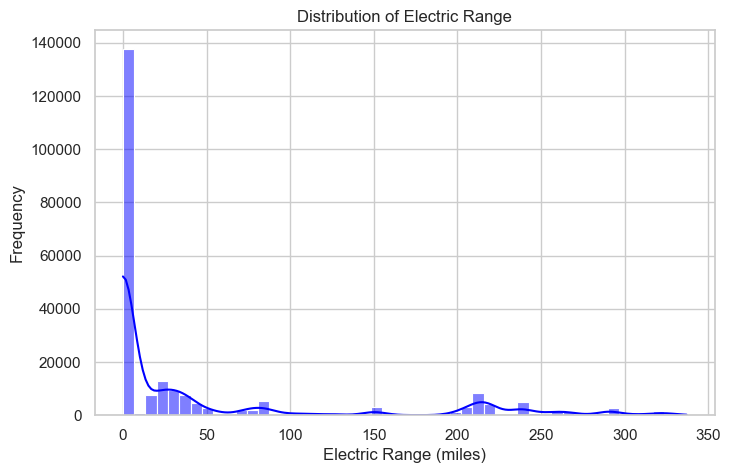

In [7]:
# ---- Data Visualization ----
sns.set(style="whitegrid")

# Electric Range Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Electric Range"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

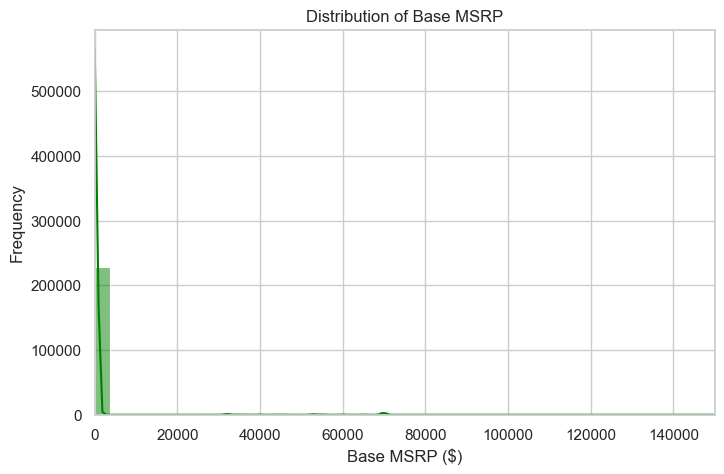

In [8]:
# Base MSRP Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Base MSRP"].dropna(), bins=50, kde=True, color="green")
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Frequency")
plt.xlim(0, 150000)
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_12064\2002154847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, palette=["blue", "orange"])


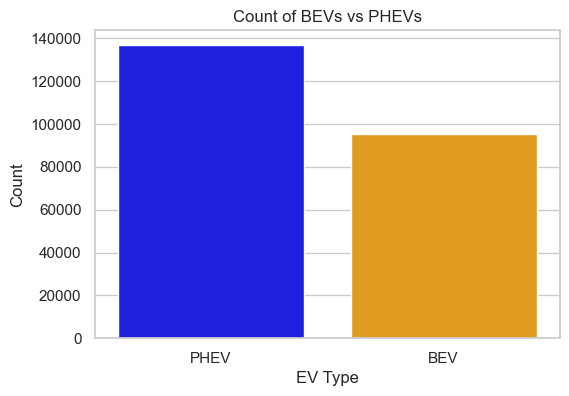

In [9]:
# BEV vs. PHEV Count
ev_type_counts = df_cleaned["EV Category"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, palette=["blue", "orange"])
plt.title("Count of BEVs vs PHEVs")
plt.xlabel("EV Type")
plt.ylabel("Count")
plt.show()

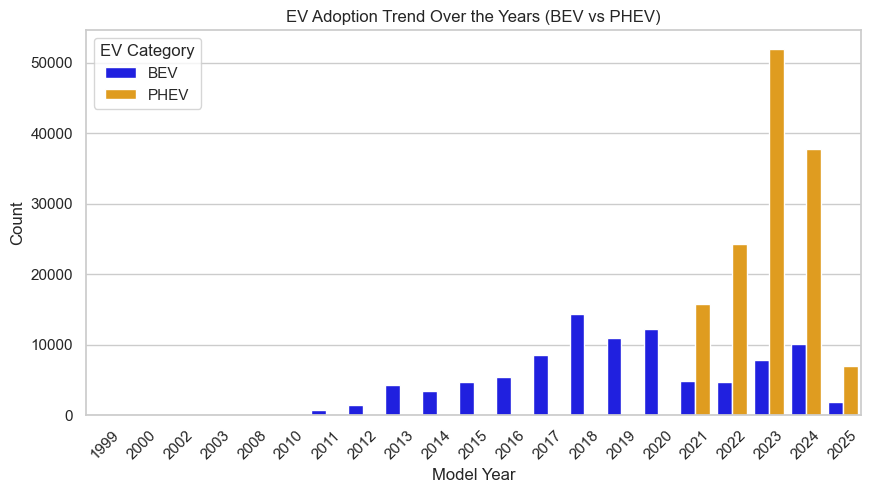

In [10]:
# EV Adoption Trend Over the Years
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x="Model Year", hue="EV Category", palette=["blue", "orange"])
plt.xticks(rotation=45)
plt.title("EV Adoption Trend Over the Years (BEV vs PHEV)")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_12064\836297796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


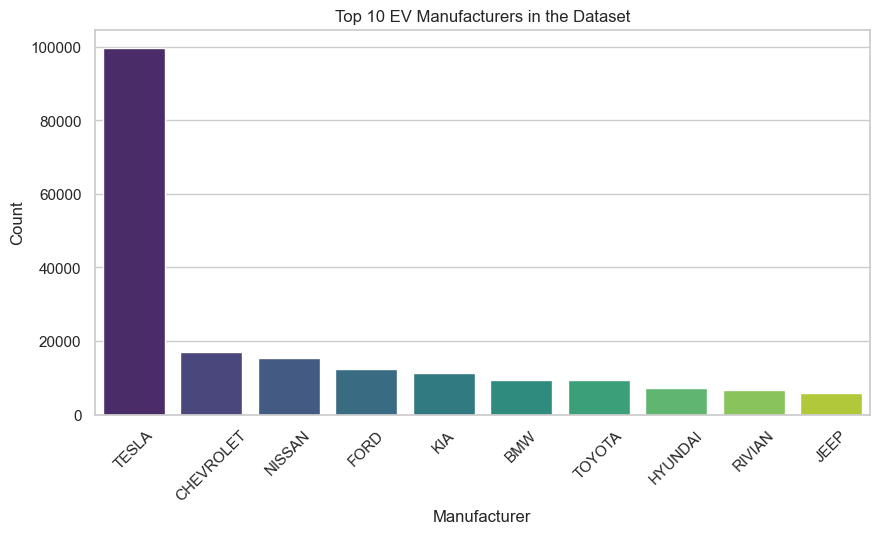

In [11]:
# Top EV Manufacturers
top_makes = df_cleaned["Make"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title("Top 10 EV Manufacturers in the Dataset")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

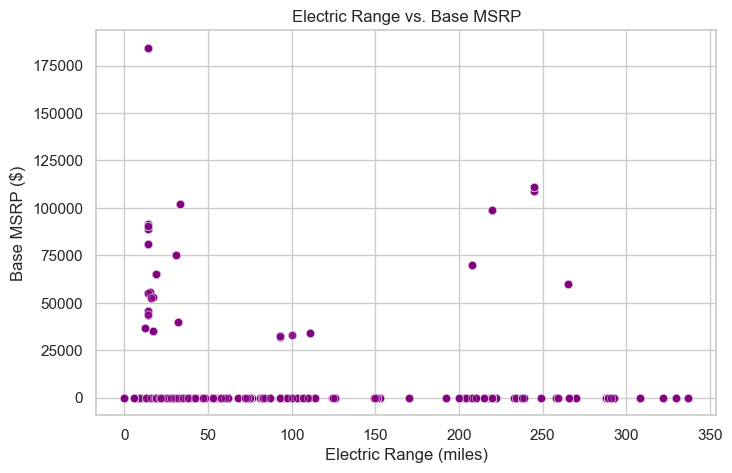

In [12]:
# Electric Range vs MSRP
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x="Electric Range", y="Base MSRP", alpha=0.5, color="purple")
plt.title("Electric Range vs. Base MSRP")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP ($)")
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_12064\169711187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")


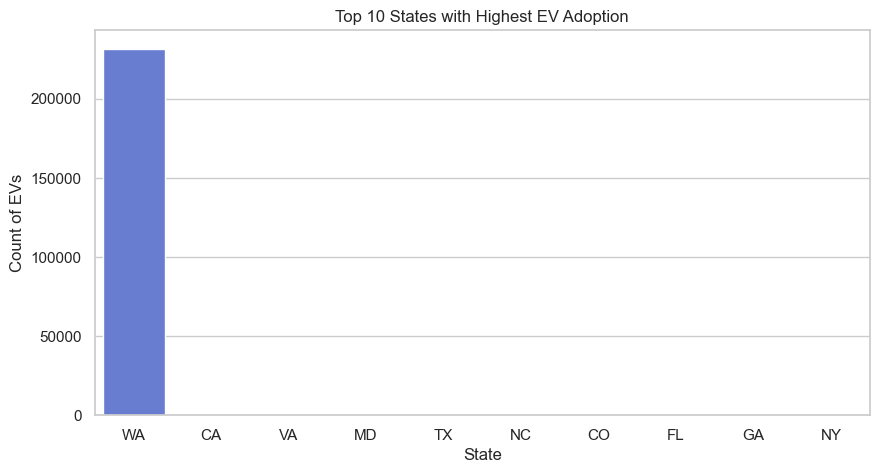

In [13]:
# EV Adoption by State
top_states = df_cleaned["State"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")
plt.title("Top 10 States with Highest EV Adoption")
plt.xlabel("State")
plt.ylabel("Count of EVs")
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_12064\1748438078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_utilities.index, y=top_utilities.values, palette="plasma")


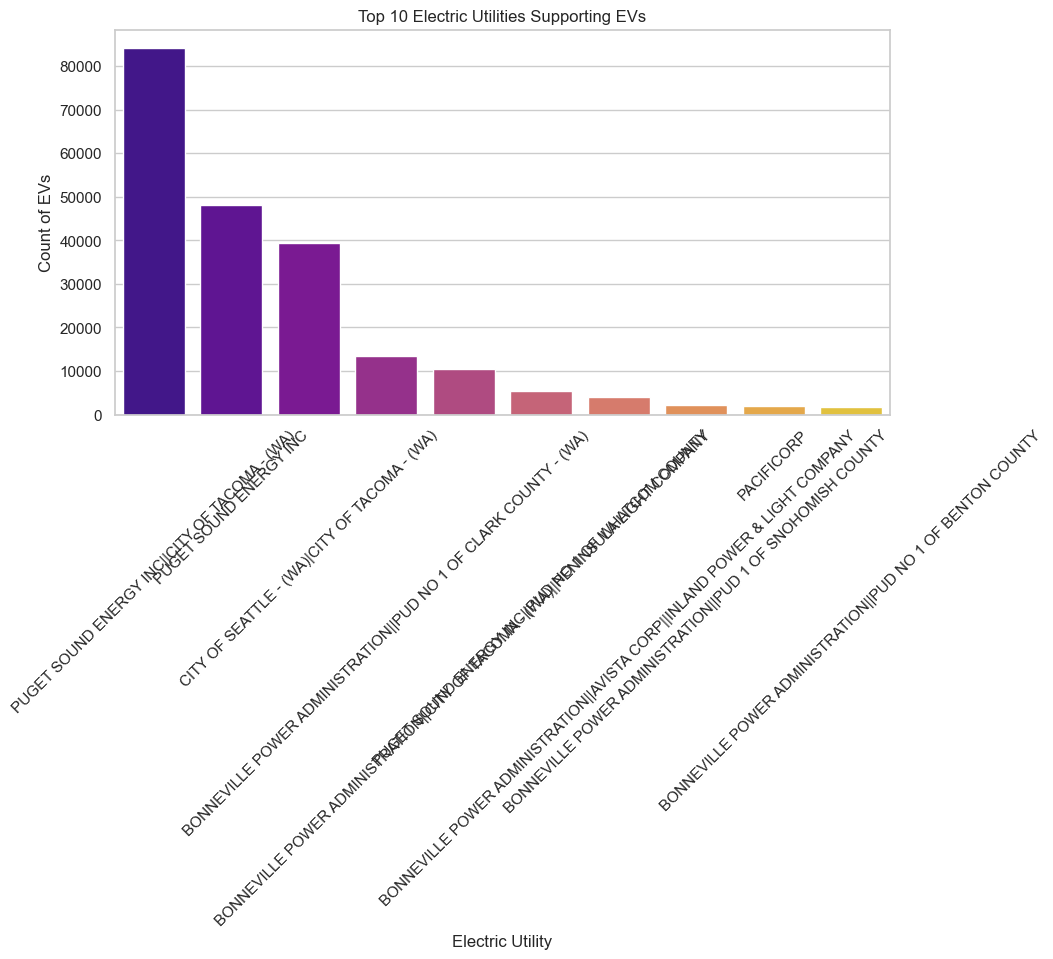

In [14]:
# Top Electric Utilities (if column exists)
if "Electric Utility" in df_cleaned.columns:
    top_utilities = df_cleaned["Electric Utility"].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_utilities.index, y=top_utilities.values, palette="plasma")
    plt.title("Top 10 Electric Utilities Supporting EVs")
    plt.xlabel("Electric Utility")
    plt.ylabel("Count of EVs")
    plt.xticks(rotation=45)
    plt.show()